In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# group into buckets
def plot_score_distribution_v3(values, ranges, exp_name, out_dir):
    def bucket_value(val, ranges):
        try:
            _ = ranges[0]
            for start, end in ranges:
                if start <= val < end:
                    if end == -0.01:
                        return f"({start}, 0)"
                    if start == -0.01:
                        return "0"
                    if start == 0.01:
                        return f"(0, {end})"
                    return f"({start}, {end})"
            return f"({end}+)"
        except:
            for x in ranges:
                if x == val:
                    return f"{x}"
            return "others"

    df = pd.DataFrame(values, columns=["Value"])
    df["Bucket"] = df["Value"].apply(bucket_value, ranges=ranges)

    try:
        order = [f"({start}, {end})" for start, end in ranges] # + [f"({ranges[-1][1]}+)"]
    except:
        order = [f"{x}" for x in ranges] + ["others"]

    order_corrected = []
    for start, end in ranges:
        if end == -0.01:
            order_corrected.append(f"({start}, 0)")
        elif start == -0.01:
            order_corrected.append("0")
        elif start == 0.01:
            order_corrected.append(f"(0, {end})")
        else:
            order_corrected.append(f"({start}, {end})")

    plt.figure(figsize=(15, 4))
    sns.countplot(data=df, x="Bucket", order=order_corrected)
    plt.title(exp_name)
    plt.show()
    # plt.savefig(os.path.join(f"{exp_name}.png"))
    # print(os.path.join(f"{exp_name}.png"))


# plot_score_distribution_v3(tgt_pos_percentage, [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1)], 'target_position_in_file', data_dir)
# plot_score_distribution_v3(es_deltas, [(-1, -0.66), (-0.66, -0.33), (-0.33, -0.01), (-0.01, 0.01), (0.01, 0.33), (0.33, 0.66), (0.66, 1)], 'es_change_with_cfc', data_dir)
# plot_score_distribution_v3(es_deltas, [(-1, -0.8), (-0.8, -0.6), (-0.6, -0.4), (-0.4, -0.2), (-0.2, -0.01), (-0.01, 0.01), (0.01, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)], 'Performance Change After Retrieval (ES)', data_dir)
# plot_score_distribution_v3(tgt_pos_percentage, [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)], 'tgt_pos_percentage', data_dir)
# plot_score_distribution_v3(tgt_lens, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'tgt_length', data_dir)

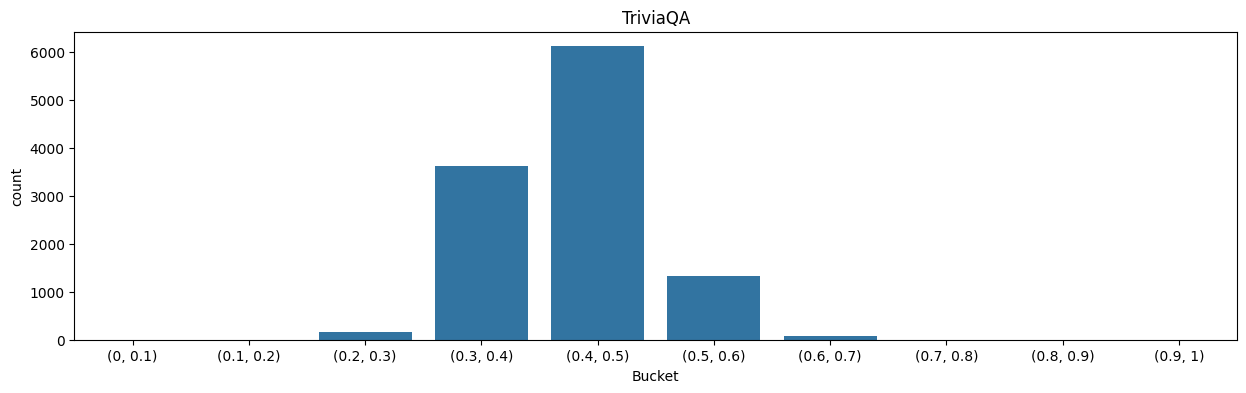

In [6]:

task = 'TriviaQA' # 'PopQA' 'PubHealth'
infile = '/home/diwu/ralm/self-rag/results/triviaqa/adaptive-rag/selfrag-7b-t0.2.json.retrievalprobs.json'
probs = json.load(open(infile))

plot_score_distribution_v3(probs, [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1)], task, "")

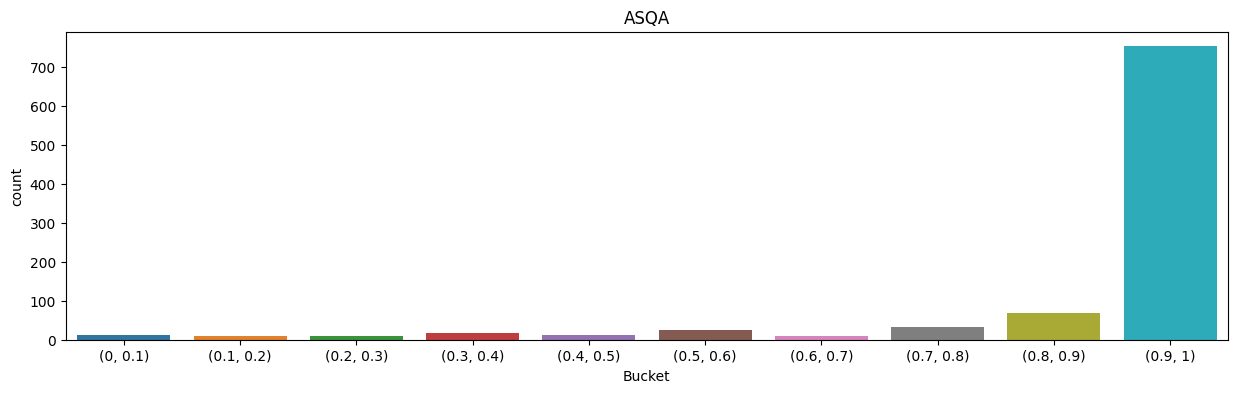

In [20]:
task = 'ASQA' # 'ASQA' 'Biograph'
infile = '/home/diwu/ralm/self-rag/results/asqa/always-rag/selfrag-7b.json'
# probs = [json.loads(line)['first_round_retrieve_prob'] for line in open(infile)]
probs = [x['first_round_retrieve_prob'] for x in json.load(open(infile))['data']]
# data = [json.loads(line) for line in open(infile)]
# print(data[0]['data'][0])
# probs = json.load(open(infile))

plot_score_distribution_v3(probs, [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1)], task, "")
# plot_score_distribution_v3(probs, [(0, 0.9), (0.9, 0.92), (0.92, 0.94), (0.94, 0.96), (0.96, 0.98), (0.98, 1)], task, "")

In [19]:
probs

[0.9985335422951517]